In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [142]:
df = pd.read_csv('./vars.txt', sep='\s+', low_memory=False)
df = df.replace(r'Z|x', 0, regex=True).astype(int)
# df = df.replace('x', 0)

df_q = pd.read_csv('./q_fit_10bits_no_drop.txt', header=None)
df_q[1] = np.arange(0, 1023)
df_q.columns = ['q_measured', 'i_ref']

df_q = df_q.iloc[: , [1, 0]]

df_q

,i_ref,q_measured
0,0,22
1,1,22
2,2,22
3,3,22
4,4,22
...,...,...
1018,1018,300
1019,1019,303
1020,1020,307
1021,1021,310


In [143]:
df_r = df[df['ready'] == 1]

In [144]:
df_r

,time,clk,rst,start,enable,i_ref,q_measured,ready,q_desired,converged
697,697,1,0,1,1,511,56,1,21,0
698,698,0,0,1,1,511,56,1,21,0
1131,1131,1,0,1,1,255,35,1,21,0
1132,1132,0,0,1,1,255,35,1,21,0
1505,1505,1,0,1,1,127,30,1,21,0
...,...,...,...,...,...,...,...,...,...,...
113328,113328,0,0,1,1,991,23,1,300,0
113617,113617,1,0,1,1,1023,23,1,300,0
113618,113618,0,0,1,1,1023,23,1,300,0
114829,114829,1,0,1,1,767,100,1,300,0


In [145]:
df_r

,time,clk,rst,start,enable,i_ref,q_measured,ready,q_desired,converged
697,697,1,0,1,1,511,56,1,21,0
698,698,0,0,1,1,511,56,1,21,0
1131,1131,1,0,1,1,255,35,1,21,0
1132,1132,0,0,1,1,255,35,1,21,0
1505,1505,1,0,1,1,127,30,1,21,0
...,...,...,...,...,...,...,...,...,...,...
113328,113328,0,0,1,1,991,23,1,300,0
113617,113617,1,0,1,1,1023,23,1,300,0
113618,113618,0,0,1,1,1023,23,1,300,0
114829,114829,1,0,1,1,767,100,1,300,0


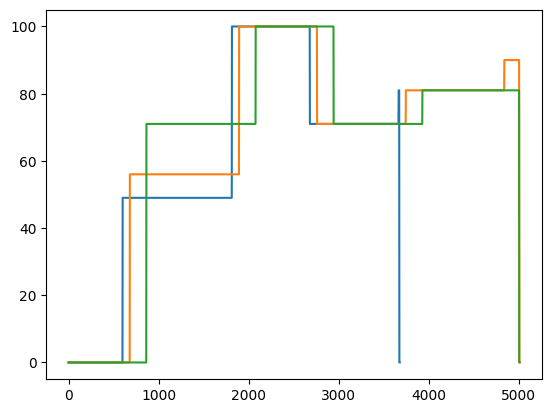

In [146]:
grouped = df.groupby('q_desired')

dfs = [g for _, g in grouped]

f, ax = plt.subplots()

# for i in range(15, 20):
#     ax.plot(dfs[i]['q_measured'], label=dfs[i]['q_desired'])


for i, df in enumerate(dfs):
    df = df.reset_index()
    if ((i > 20) and (i < 24)):
        ax.plot(df.index.values, df['q_measured'])

# f.legend()

# dfs[][['time', 'q_measured']].plot(x='time')

[Text(0.5, 0, 'Time [ps]')]

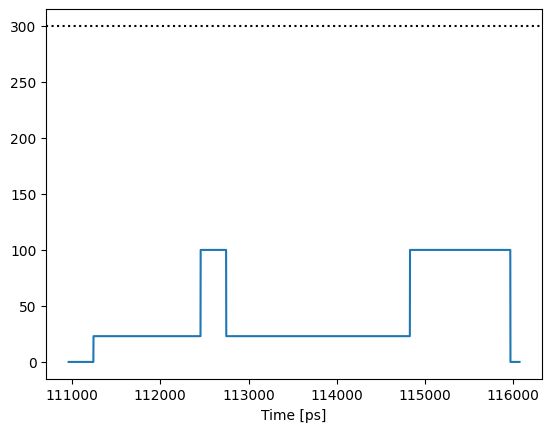

In [147]:
f, ax = plt.subplots()

ax.plot(df['time'], df['q_measured'])
ax.axhline(y=df['q_desired'].max(), linestyle=':', c='k')

ax.set(xlabel='Time [ps]')

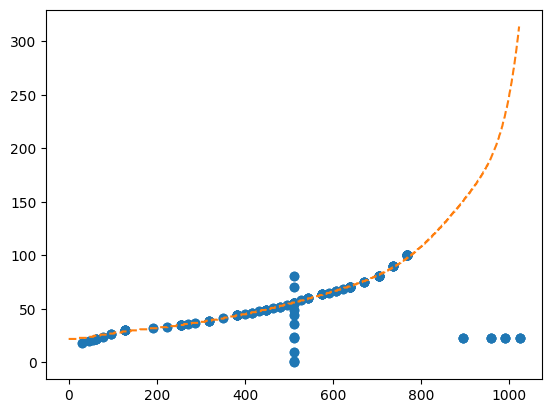

In [148]:

plt.plot(df_r['i_ref'], df_r['q_measured'], 'o')
plt.plot(df_q['i_ref'], df_q['q_measured'], '--')

In [149]:
df_r

,time,clk,rst,start,enable,i_ref,q_measured,ready,q_desired,converged
697,697,1,0,1,1,511,56,1,21,0
698,698,0,0,1,1,511,56,1,21,0
1131,1131,1,0,1,1,255,35,1,21,0
1132,1132,0,0,1,1,255,35,1,21,0
1505,1505,1,0,1,1,127,30,1,21,0
...,...,...,...,...,...,...,...,...,...,...
113328,113328,0,0,1,1,991,23,1,300,0
113617,113617,1,0,1,1,1023,23,1,300,0
113618,113618,0,0,1,1,1023,23,1,300,0
114829,114829,1,0,1,1,767,100,1,300,0


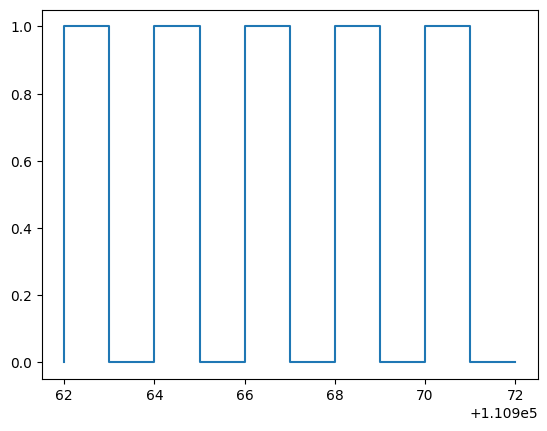

In [150]:
time = df.loc[:10, 'time']
clk = df.loc[:10, 'clk']

plt.step(time, clk)